# **Module 2: Probability Distributions & Interference**

**PHY657 Statistics & Data Analysis**  
February 16, 2026

In [1]:
%matplotlib widget
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('dark_background')
plt.close('all')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "DejaVu Serif",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

### **Activity 1: Empirical verification of the Central Limit Theorem**

Consider $N$ variables $x_1,\cdot,x_N$ each of which has a uniform distribution over the interval [0,1]. Consider the distribution of:
$$
\bar{x}=\frac{1}{N}\sum_{i=1}^N x_i
$$

for $N=1,2,10$. Can you fit the distribution of $\bar{x}$ for N=10 with a Gaussian PDF?  

**For your lab report:**  
review the central limit theorem and its implication in statistics and give examples where the Gaussian PDF is appropriate.

---

### **Activity 2: Poisson distribution (mean & variance)**

Consider a Poisson process with rate parameter $\lambda$. The probability of observing $k$ events in a fixed interval is given by the Poisson distribution. 

---

1. **Write the Poisson probability mass function $p(k|\lambda)$**
2. **Compute the expectation value $\langle k \rangle$.**
3. **Compute the variance $\text{Var}(k)$.**
4. **Show explicitly that $\text{Var}(k)=\langle k \rangle$.**
5. **Briefly discuss the physical meaninig of this result for counting experiments.**

### **Activity 3: Practice with multi-dimensional Gaussian distributions**

1. **Generate 1000 events characterized by coordinates $(x_i,y_i)$ that are random variates distributed to a 2D Gaussian PDF with mean $[0,0]$ and covariance matrix**

\begin{align}
\Sigma=
\begin{pmatrix}
    4 & 2 \\
    2 & 16
\end{pmatrix}
\end{align}

---

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def sample_2d_gaussian(n, mean, cov, seed=2):
    """Draw n samples from N(mean, cov)."""
    rng = np.random.default_rng(seed)
    return rng.multivariate_normal(mean=mean, cov=cov, size=n)


def probability_density(x, y, mean, cov):
    """Compute the probability density of a 2D Gaussian at points (x, y)."""
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (2 * np.pi * np.sqrt(det_cov))

    diff = np.array([x - mean[0], y - mean[1]])
    exponent = -0.5 * np.einsum('...j,jk,...k->...', diff.T, inv_cov, diff.T)

    return norm_const * np.exp(exponent)


def plot_scattering(samples, mean, cov, levels=[0.1, 0.3, 0.5, 0.7, 0.9]):
    x = samples[:, 0]
    y = samples[:, 1]

    x_min, x_max = x.min() - np.std(x), x.max() + np.std(x)
    y_min, y_max = y.min() - np.std(y), y.max() + np.std(y)
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    Z = probability_density(X, Y, mean, cov)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y, alpha=0.5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("2D Gaussian Samples with Contours")

    peak = 1.0 / (2.0 * np.pi * np.sqrt(np.linalg.det(cov)))
    contour_levels = [f * peak for f in levels]

    ax.contour(X, Y, Z, levels=contour_levels, linewidths=2)
    plt.show()


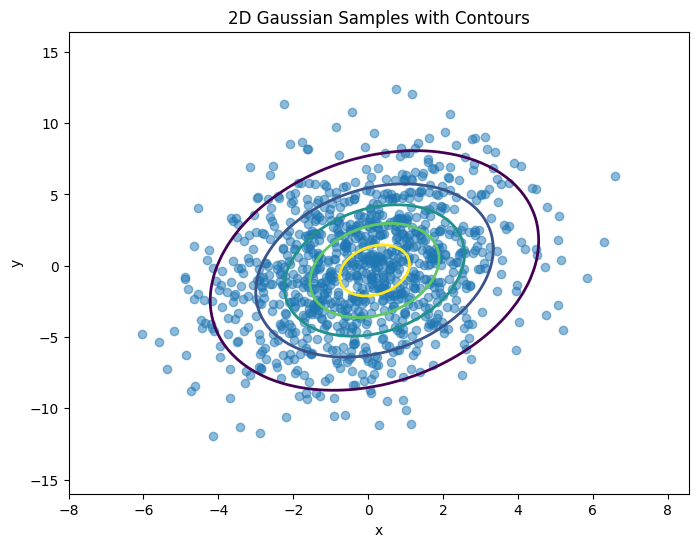

In [34]:
mean = [0.0, 0.0]
cov = [[4.0, 2.0],
       [2.0, 16.0]]

samples = sample_2d_gaussian(n=1000, mean=mean, cov=cov, seed=2)
plot_scattering(samples, mean, cov)


2. **Produce a scatter plot of this distribution and draw the contours of constant probability density. Can you give and example of a pair of observables that exhibit such a correlation?**

Consider two weakly coupled oscillators with equations of motion as follows
$$
\ddot{x}+\omega_1^2x+\kappa y=0 \\
\ddot{y}+\omega_2^2y+\kappa x=0.
$$
If we take their position $(x,y)$ as observables, then they fluctuate due to thermal noise. The joint distribution is Gaussian, and the couplings $\kappa x$ and $\kappa y$ ensure nonzero correlations $\langle x, y\rangle\neq 0$. In fact, the Hamiltonian of the system is given by quadratic terms 
$$
H=\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+\frac{1}{2}k_xx^2+\frac{1}{2}k_yy^2+k_{xy}xy.
$$
At temperature $T=1/\beta$, the probability density in phase space is 
$$
P(x,y,p_x,p_y)\propto e^{-\beta H},
$$
which gives a Gaussian distribution of $(x,y)$ after integrating momenta out. The covariance matrix is found to be 
$$
\Sigma=\beta
\begin{pmatrix}
    k_x & k_{xy} \\
    k_{xy} & k_y
\end{pmatrix}.
$$

---

### **Activity 5: Maximum likelihood estimation for $\mu$ and $\Sigma$ (Multivariate Gaussian)**

Generate a data set $\vec{X}=(x_1\cdot x_N)$ where you assume that the observations $\{x_n\}$ are drawn independently from a multivariate Gaussian distribution. Evaluate the maximum likelihood expectations for $\mu$ and $\Sigma$.

Implement a sequential estimator as described in Section 2.3.5

**For your laboratory report:** connect this activity with the concepts of bias in an estimator and remedies to this problem.

True mu: [ 1. -2.]
Batch mu_ML: [ 0.9169643  -2.38855375]
Seq   mu_ML: [ 0.9169643  -2.38855375]

True Sigma:
 [[ 4.  2.]
 [ 2. 16.]]
Batch Sigma_ML:
 [[ 3.86405083  1.45961713]
 [ 1.45961713 15.12675725]]
Seq   Sigma_ML:
 [[ 3.86405083  1.45961713]
 [ 1.45961713 15.12675725]]

Final Sigma_ML (1/N):
 [[ 3.86405083  1.45961713]
 [ 1.45961713 15.12675725]]
Final Sigma_unbiased (1/(N-1)):
 [[ 3.87179442  1.46254221]
 [ 1.46254221 15.15707139]]


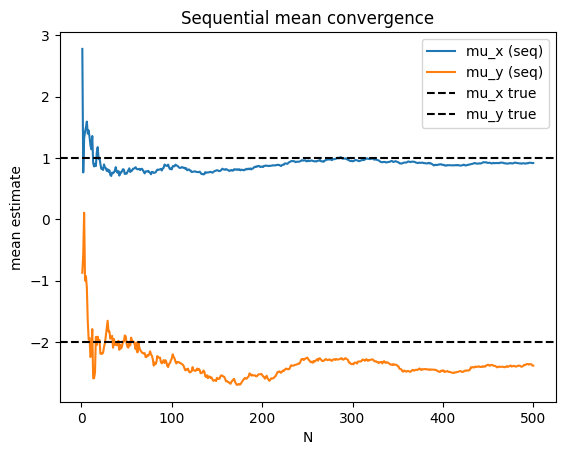

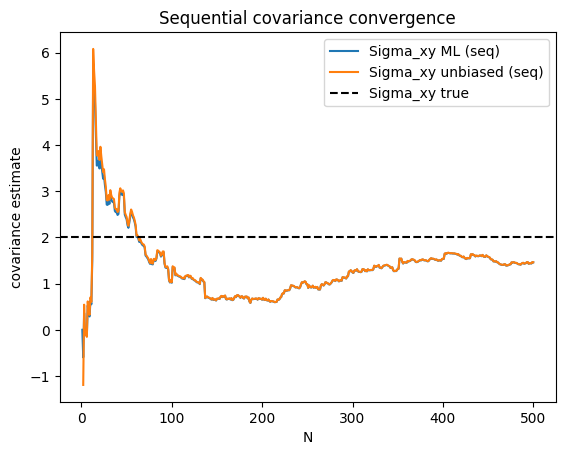

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_gaussian(N, mu, Sigma, seed=0):
    """Draw N samples from a Gaussian distribution with mean mu and covariance Sigma."""
    rng = np.random.default_rng(seed)
    return rng.multivariate_normal(mean=mu, cov=Sigma, size=N)

def mle_batch(X):
    """Compute the MLE estimates of mean and covariance for a batch of samples."""
    mu = X.mean(axis=0)
    Xc = X - mu
    Sigma = (Xc.T @ Xc) / X.shape[0]
    return mu, Sigma

def mle_sequential(X):
    """Compute the MLE estimates of mean and covariance sequentially.
    Output the history of estimates for mean, ML covariance, and unbiased covariance."""
    N, D = X.shape
    mu_hist = np.zeros((N, D))
    Sigma_ml_hist = np.zeros((N, D, D))
    Sigma_unb_hist = np.zeros((N, D, D))

    mu = np.zeros(D)
    S = np.zeros((D, D))

    for n in range(1, N + 1):
        x = X[n - 1]

        delta = x - mu
        mu = mu + delta / n
        delta2 = x - mu

        S = S + np.outer(delta, delta2)

        mu_hist[n - 1] = mu
        Sigma_ml_hist[n - 1] = S / n
        Sigma_unb_hist[n - 1] = S / (n - 1)

    return mu_hist, Sigma_ml_hist, Sigma_unb_hist

def demo():
    "Demo the batch and sequential MLE for a 2D Gaussian with mean and covariance drawn from Activity 3."
    mu_true = np.array([1.0, -2.0])
    Sigma_true = np.array([[4.0, 2.0],
                           [2.0, 16.0]])

    N = 500
    X = sample_gaussian(N, mu_true, Sigma_true, seed=1)

    # ---- batch MLE ----
    mu_b, Sigma_b = mle_batch(X)

    # ---- sequential ----
    mu_hist, Sigma_ml_hist, Sigma_unb_hist = mle_sequential(X)
    mu_seq = mu_hist[-1]
    Sigma_seq = Sigma_ml_hist[-1]

    print("True mu:", mu_true)
    print("Batch mu_ML:", mu_b)
    print("Seq   mu_ML:", mu_seq)
    print()
    print("True Sigma:\n", Sigma_true)
    print("Batch Sigma_ML:\n", Sigma_b)
    print("Seq   Sigma_ML:\n", Sigma_seq)

    # ---- show bias for covariance ----
    Sigma_ml_final = Sigma_ml_hist[-1]
    Sigma_unb_final = Sigma_unb_hist[-1]
    print("\nFinal Sigma_ML (1/N):\n", Sigma_ml_final)
    print("Final Sigma_unbiased (1/(N-1)):\n", Sigma_unb_final)

    # ---- convergence plot ----
    ns = np.arange(1, N + 1)

    plt.figure()
    plt.plot(ns, mu_hist[:, 0], label="mu_x (seq)")
    plt.plot(ns, mu_hist[:, 1], label="mu_y (seq)")
    plt.axhline(mu_true[0], linestyle="--", color='black', label="mu_x true")
    plt.axhline(mu_true[1], linestyle="--", color='black', label="mu_y true")
    plt.xlabel("N")
    plt.ylabel("mean estimate")
    plt.title("Sequential mean convergence")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(ns, Sigma_ml_hist[:, 0, 1], label="Sigma_xy ML (seq)")
    plt.plot(ns, Sigma_unb_hist[:, 0, 1], label="Sigma_xy unbiased (seq)")
    plt.axhline(Sigma_true[0, 1], linestyle="--", color='black', label="Sigma_xy true")
    plt.xlabel("N")
    plt.ylabel("covariance estimate")
    plt.title("Sequential covariance convergence")
    plt.legend()
    plt.show()

demo()


The results of maximum likelihood expectations are shown above sequentially and with a batch of samples. The plots show the convergence of the ML mean and covariance for the sequential algorithm as a function of step. For this specific Gaussian example, the two methods do not show differences in ML means and covariances given the output results. Unbiased $\Sigma$ is also computed for the sequential algorithm and plotted in the second plot. There are small differences between biased and unbiased covariance at the beginning of the algorithm, which becomes negligible as step evolves. 